### Prediction of Customer Response to a marketing campaign

o   The data is related with direct marketing campaigns of a Portuguese banking institution,classification goal is to predict if the client will subscribe a term deposit or not given the customer information as input varibles
 
o   This self project aims at classification using various methods such as logistic regression, KNN, decision trees and Random Forest do the model diagnostics using various metrics.

o   Firstly, Exploratory data analysis is performed to know the information regarding the data and then data pre-processing is done. Outlier's detection is done using Box Plots. As the data is imbalnced resampling technique is used to get the train data.

o   Implemented models and checked for various evaluation metrics confusion matrix and AUC under ROC

o   Performed exploratory data analysis for outlier’s detection and used resampling technique to deal with imbalanced data

o   Solved binary classification problem using various supervised machine learning methods such as logistic regression, KNN, decision tree, and ensemble learning algorithm Random Forest, and also compared the evaluation metrics

o   Employed Grid-search technique to configure best parameters with AUC under ROC as metric and trained the model

o	Plotted gain and lift charts to segregate the customers likely to respond and target these customers for the campaign



In [1]:
#importing useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [2]:
#Loading the bank data from UCI machine learning repository [Moro et al., 2011]

df = pd.read_csv('bank.csv',sep=';')
display(df.info())
display(df.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


None

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


4521 observations and total 17 columns (input variables or attributes) are present
All the columns are not required to build model we take only the features that can explain the variation of dependent varible
Here 'y' refers to the dependent variable it contains info about whether the customer subscibed the term deposit or not
Only two output classes are present("YES" or "NO")

In [3]:
#Categorical features and no.of categories in particular column
lis=list(df.select_dtypes(include=['object']).columns)
for i in lis:
    print(i)
    display(df[i].value_counts())

job


management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

marital


married     2797
single      1196
divorced     528
Name: marital, dtype: int64

education


secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

default


no     4445
yes      76
Name: default, dtype: int64

housing


yes    2559
no     1962
Name: housing, dtype: int64

loan


no     3830
yes     691
Name: loan, dtype: int64

contact


cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

month


may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

poutcome


unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

y


no     4000
yes     521
Name: y, dtype: int64

In [4]:
#First we check for null values if any
display(df.isnull().values.any())
display(df.isnull().sum())
#No any null values in the data

False

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
#Dropping the columns of date and month and duration  and pdays as they don't represent the variation in dependent variable
new_df=df.drop(['contact','day','month','duration','pdays','poutcome'],axis=1)
bank_df=new_df.rename(columns={'housing':'housing-loan','loan':'personal-loan','campaign':'current-campaign','previous':'previous-campaign','y':'subscribed'})
bank_df.head(5)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [6]:
bank_df.info()
count=0
for i in range(len(bank_df)):
    if bank_df.subscribed[i]=="yes":
        count+=1
print('No.of customers subscribed the term_deposit',count,'out of :',len(bank_df),'customers contacted')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
age                  4521 non-null int64
job                  4521 non-null object
marital              4521 non-null object
education            4521 non-null object
default              4521 non-null object
balance              4521 non-null int64
housing-loan         4521 non-null object
personal-loan        4521 non-null object
current-campaign     4521 non-null int64
previous-campaign    4521 non-null int64
subscribed           4521 non-null object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB
No.of customers subscribed the term_deposit 521 out of : 4521 customers contacted


#### Outlier Analysis::

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028186286278>]],
      dtype=object)

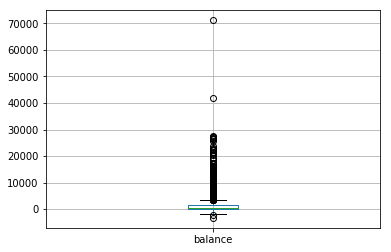

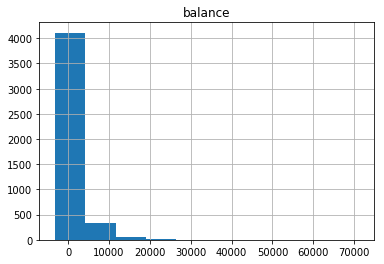

In [7]:
import seaborn as sn
display(bank_df[['balance']].boxplot())
bank_df.hist(column='balance')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000281863E8A58>]],
      dtype=object)

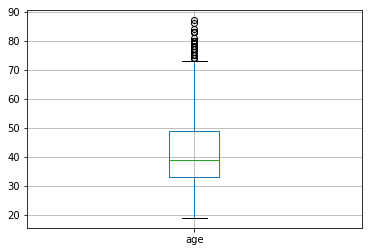

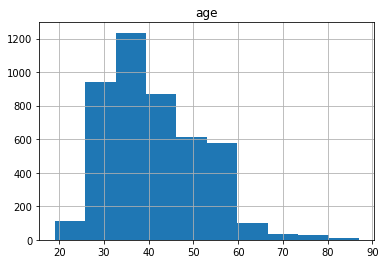

In [8]:
display(bank_df[['age']].boxplot())
bank_df.hist(column='age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000281863E87B8>]],
      dtype=object)

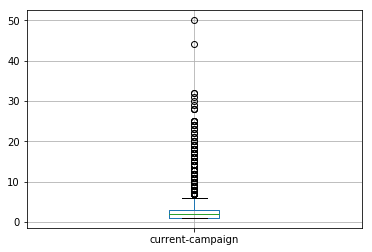

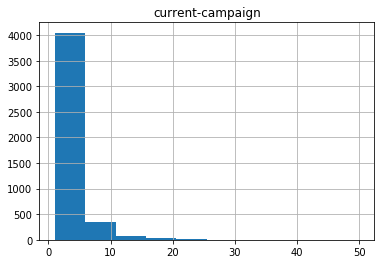

In [9]:
bank_df[['current-campaign']].boxplot()
bank_df.hist(column='current-campaign')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000281864DFA58>]],
      dtype=object)

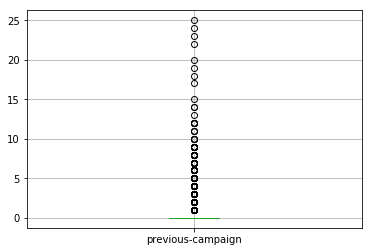

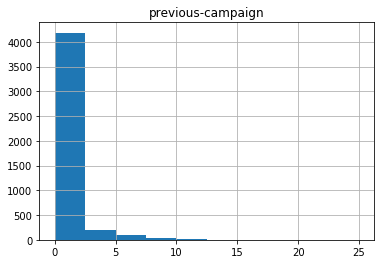

In [10]:
bank_df[['previous-campaign']].boxplot()
bank_df.hist(column='previous-campaign')

#### IMBALANCED DATA HANDLING::
Dealing with imbalance data set as the number of customers subscribed are very less compared to those who didn't subscribe
representation of two classes is not equal
Bootstrapping Technique to deal with imbalanced data set :Upsampling is done here
The other important thing is to shuffle the data after upsampling to remove any pattern

In [38]:

from sklearn.utils import resample
from sklearn.utils import shuffle

customers_subscribed= bank_df[bank_df.subscribed =='yes']
customers_not_subscribed= bank_df[bank_df.subscribed =='no']
##Upsample the subscribed observations.

customers_subscribed_upsampled = resample(customers_subscribed,replace=True,n_samples=2000)
bank_df_concated=pd.concat([customers_not_subscribed,customers_subscribed_upsampled])

bank_df_new=shuffle(bank_df_concated)


In [39]:
bank_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 4040 to 4392
Data columns (total 11 columns):
age                  6000 non-null int64
job                  6000 non-null object
marital              6000 non-null object
education            6000 non-null object
default              6000 non-null object
balance              6000 non-null int64
housing-loan         6000 non-null object
personal-loan        6000 non-null object
current-campaign     6000 non-null int64
previous-campaign    6000 non-null int64
subscribed           6000 non-null object
dtypes: int64(4), object(7)
memory usage: 562.5+ KB


In [40]:
X_features = list( bank_df_new.columns )
X_features.remove('subscribed')
X_features
#Convert the categorical features to dummies
X= pd.get_dummies( bank_df_new[X_features],drop_first = True )
X.head(3)

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
4040,53,27,3,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
215,42,372,2,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
267,33,-988,3,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1


In [41]:
#Encoding the output categories :yes=>1  and no=>1
Y = bank_df_new.subscribed.map( lambda x: int( x == 'yes') )


In [42]:
#Split the data into train and test set:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

# Logistic Regression Classifier:

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


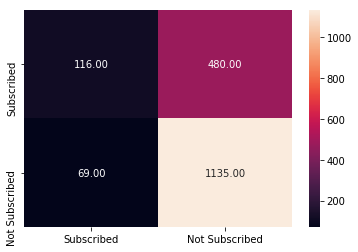

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred_log=logit.predict(X_test)

cm= metrics.confusion_matrix( y_test, y_pred_log, [1,0] )
sn.heatmap(cm, annot=True, fmt='.2f',xticklabels = ['Subscribed', 'Not Subscribed'],
           yticklabels = ['Subscribed', 'Not Subscribed'] )

In [44]:
#Classification report
print(metrics.classification_report( y_test, y_pred_log ) )

              precision    recall  f1-score   support

           0       0.70      0.94      0.81      1204
           1       0.63      0.19      0.30       596

    accuracy                           0.69      1800
   macro avg       0.66      0.57      0.55      1800
weighted avg       0.68      0.69      0.64      1800



,0,1
0,0.193543,0.806457
1,0.661990,0.338010
2,0.611847,0.388153


,index,actual,prob_of_1
0,3656,0,0.806457
1,12,0,0.338010
2,1607,0,0.388153
3,3936,1,0.264888
4,3135,1,0.279493
5,2044,0,0.227463
6,3702,0,0.194361
7,545,0,0.130003
8,4421,0,0.352394
9,686,0,0.219712


Area under ROC: 0.69


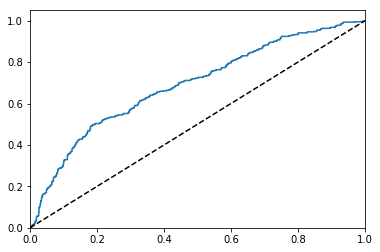

In [45]:
#ROC curve and Area under ROC
predict_proba_df = pd.DataFrame( logit.predict_proba(X_test) )
display(predict_proba_df.head(3))

df_prob=pd.DataFrame({'actual':y_test})
df_prob=df_prob.reset_index()
df_prob['prob_of_1']=predict_proba_df.iloc[:,1:2]
display(df_prob.head(10))

auc_score = metrics.roc_auc_score(df_prob.actual,df_prob.prob_of_1)

fpr, tpr, thresholds = metrics.roc_curve( df_prob.actual,df_prob.prob_of_1,drop_intermediate =False )
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

print('Area under ROC:',round( float( auc_score ), 2 ))

#### Gain and Lift Charts

In [46]:
df_n=df_prob.sort_values('prob_of_1',ascending=False)
df_n.head(3)
#divide the data into deciles
df_n['decile']=1
idx=0
for i in range(1,11):
    lim=(len(df_n)//10)*i
    while(idx<lim):
        df_n.iloc[idx,3]=i
        idx+=1
df_n.head(5)    
gain_df=pd.DataFrame(df_n.groupby('decile')['actual'].sum())
gain_df=gain_df.reset_index()
gain_df.columns=['decile','gain']


,decile,gain,percentage_of_gain
0,1,116,19.463087
1,2,99,36.073826
2,3,85,50.335570
3,4,46,58.053691
4,5,52,66.778523
5,6,40,73.489933
6,7,57,83.053691
7,8,46,90.771812
8,9,32,96.140940
9,10,23,100.000000


Text(0.5, 1.0, 'Gain_Chart')

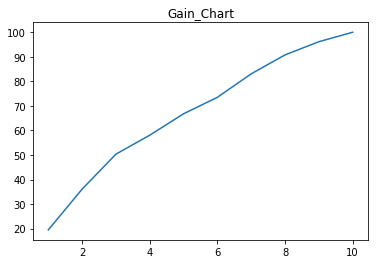

In [47]:
gain_df['percentage_of_gain']=(gain_df['gain'].cumsum()*100)/gain_df['gain'].sum()
display(gain_df)
plt.plot(gain_df['decile'],gain_df['percentage_of_gain'])
plt.title('Gain_Chart')

So from gain chart we can say that if we contact first 6 decile customers we would get 75% of the subscribers.
This way we can target the customers who are most likely to subscribe for a product or service

,decile,gain,percentage_of_gain,lift
0,1,116,19.463087,1.946309
1,2,99,36.073826,1.803691
2,3,85,50.335570,1.677852
3,4,46,58.053691,1.451342
4,5,52,66.778523,1.335570
5,6,40,73.489933,1.224832
6,7,57,83.053691,1.186481
7,8,46,90.771812,1.134648
8,9,32,96.140940,1.068233
9,10,23,100.000000,1.000000


Text(0.5, 1.0, 'Lift_Chart')

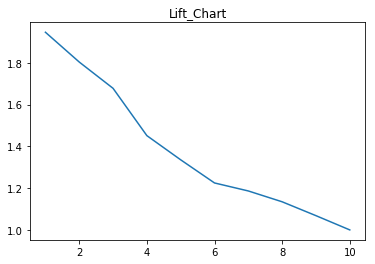

In [48]:
gain_df['lift']=gain_df.percentage_of_gain/(gain_df.decile*10)
display(gain_df)
plt.plot(gain_df['decile'],gain_df['lift'])
plt.title('Lift_Chart')


Lift is the ratio of the number of positive observations up to decile i using the model to the
expected number of positives up to that decile i based on a random model (not using a model)
We can know upto how much decile the lift value is feasible


# KNN-Classifier

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


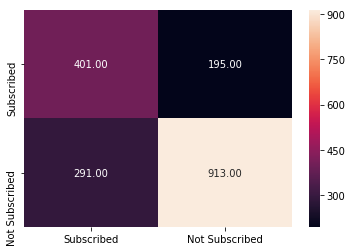

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier()
knn_clf.fit( X_train, y_train)

y_pred_knn=knn_clf.predict(X_test)

cm_knn= metrics.confusion_matrix( y_test, y_pred_knn, [1,0] )
sn.heatmap(cm_knn, annot=True, fmt='.2f',xticklabels = ['Subscribed', 'Not Subscribed'],
           yticklabels = ['Subscribed', 'Not Subscribed'] )

In [50]:
#Classification report
print(metrics.classification_report( y_test, y_pred_knn ) )

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1204
           1       0.58      0.67      0.62       596

    accuracy                           0.73      1800
   macro avg       0.70      0.72      0.71      1800
weighted avg       0.74      0.73      0.73      1800



,0,1
0,0.2,0.8
1,1.0,0.0
2,1.0,0.0


Area under ROC KNN: 0.81


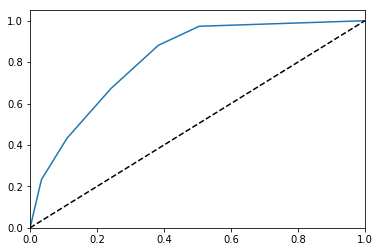

In [51]:
predict_proba_df_knn = pd.DataFrame( knn_clf.predict_proba(X_test) )
display(predict_proba_df_knn.head(3))

df_prob_knn=pd.DataFrame({'actual':y_test})
df_prob_knn=df_prob.reset_index()
df_prob_knn['prob_of_1']=predict_proba_df_knn.iloc[:,1:2]
df_prob_knn.head(3)

fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve( df_prob_knn.actual,df_prob_knn.prob_of_1,drop_intermediate =False )
plt.plot(fpr_knn, tpr_knn, label = 'ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

auc_score_knn = metrics.roc_auc_score(df_prob_knn.actual,df_prob_knn.prob_of_1)
print('Area under ROC KNN:',round( float( auc_score_knn ), 2 ))

#### Grid Search for best model paramters:

In [52]:
from sklearn.model_selection import GridSearchCV
grid_parameters = [{'n_neighbors': range(5,10),'metric': ['canberra', 'euclidean','minkowski']}]
clf = GridSearchCV(KNeighborsClassifier(),grid_parameters,cv=10,scoring='roc_auc')
clf.fit(X_train,y_train)
clf.best_score_


0.8233321339212114

In [53]:
clf.best_params_

{'metric': 'canberra', 'n_neighbors': 5}

# Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'gini',max_depth = 15)
clf_tree.fit( X_train, y_train )
tree_predict = clf_tree.predict( X_test )
print(metrics.roc_auc_score( y_test, tree_predict ))

clf_tree_entropy= DecisionTreeClassifier(criterion = 'entropy',max_depth =15)
clf_tree_entropy.fit( X_train, y_train )
tree_predict_entropy = clf_tree_entropy.predict( X_test )
print(metrics.roc_auc_score( y_test, tree_predict_entropy ))

from sklearn.model_selection import GridSearchCV
params=[{'criterion':['gini','entropy'],'max_depth':range(2,15)}]
clf_tree_best = DecisionTreeClassifier()
clf_best = GridSearchCV(clf_tree_best,params,cv=10,scoring='roc_auc')
clf_best.fit(X_train, y_train)
clf_best.best_score_

0.8090286294008785
0.8077744208343554


0.8722650856747031

In [55]:
clf_best.best_params_

{'criterion': 'gini', 'max_depth': 14}

# Random Forest (Ensemble)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rand_forest_clf=RandomForestClassifier(max_depth=15,n_estimators=10)
rand_forest_clf.fit(X_train,y_train)
y_pred_randf=rand_forest_clf.predict(X_test)
print('AUC under ROC random forest:',metrics.roc_auc_score(y_test,y_pred_randf))

tuned_parameters = [{'max_depth': [10, 18],'n_estimators': [10,20],'max_features': ['sqrt', 0.2]}]
radm_clf = RandomForestClassifier()
clf_randf = GridSearchCV(radm_clf,tuned_parameters,cv=5,scoring='roc_auc')
clf_randf.fit(X_train,y_train)
print('AUC under ROC using BEST MODEL parameters:',clf_randf.best_score_)


AUC under ROC random forest: 0.8631491226114294
AUC under ROC using BEST MODEL parameters: 0.9544310355549028


In [57]:
clf_randf.best_params_

{'max_depth': 18, 'max_features': 0.2, 'n_estimators': 20}

Area under ROC Random forest best params: 0.963


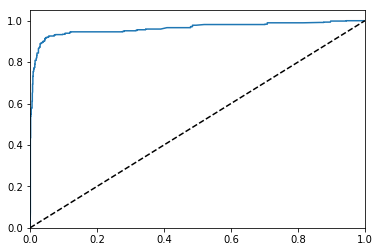

In [58]:
clf_rf=RandomForestClassifier(max_depth=18,max_features='sqrt',n_estimators=20)
clf_rf.fit(X_train,y_train)
y_pred_clf=clf_rf.predict(X_test)

predict_proba_df_randf = pd.DataFrame( clf_rf.predict_proba(X_test) )

df_prob_randf=pd.DataFrame({'actual':y_test})
df_prob_randf=df_prob.reset_index()
df_prob_randf['prob_of_1']=predict_proba_df_randf.iloc[:,1:2]
df_prob_randf.head(3)

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve( df_prob_randf.actual,df_prob_randf.prob_of_1,drop_intermediate =False )
plt.plot(fpr_rf, tpr_rf, label = 'ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

auc_score_randf= metrics.roc_auc_score(df_prob_randf.actual,df_prob_randf.prob_of_1)
print('Area under ROC Random forest best params:',round( float( auc_score_randf), 3))



C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


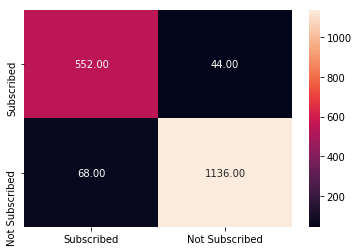

In [59]:
cm_rf= metrics.confusion_matrix( y_test, y_pred_clf, [1,0] )
sn.heatmap(cm_rf, annot=True, fmt='.2f',xticklabels = ['Subscribed', 'Not Subscribed'],
           yticklabels = ['Subscribed', 'Not Subscribed'] )

In [60]:
print( metrics.classification_report( y_test, y_pred_clf ) )

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1204
           1       0.89      0.93      0.91       596

    accuracy                           0.94      1800
   macro avg       0.93      0.93      0.93      1800
weighted avg       0.94      0.94      0.94      1800



#### Feature Importacne values 

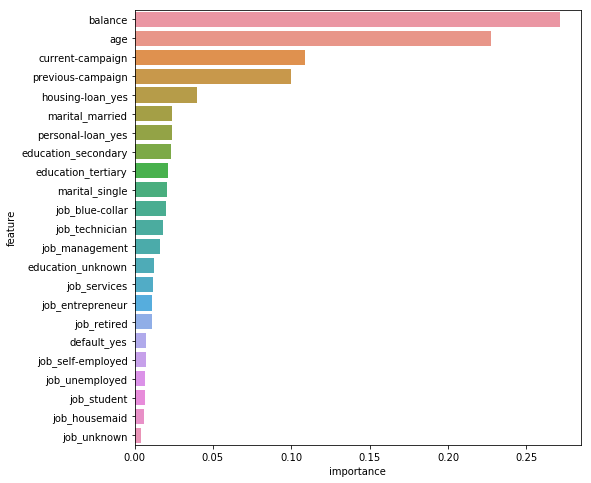

In [61]:
feature_imp = pd.DataFrame( { 'feature': X_train.columns,'importance': clf_rf.feature_importances_ } )

feature_imp_sorted = feature_imp.sort_values('importance', ascending =False)
plt.figure(figsize=(8, 8))
# plot the values
sn.barplot( y = 'feature', x = 'importance', data = feature_imp_sorted )

Hence the fetures 'balance' 'age' 'previous-campaign' and 'current-campaign' are the top 4 features which expalins whether a customer is likely to subscribe the product or service  